## Exploring Unsupervised Learning with the k-Means Algorithm

Group 11 : Santosh Sigdel, Prayusha Poudel, Tuo Yan, Binita Acharya

## Import necessary libraries

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt



## PART 1 — Algorithm Application


## Dataset Description

The Wholesale Customers Dataset contains annual spending information from customers of a wholesale distribution company in Portugal. Each row represents an individual customer, and each column describes how much they spent on different product categories such as Milk, Grocery, Frozen, and Fresh products. All spending features are numeric (monetary amounts), making this dataset well suited for unsupervised learning and k-means clustering.

This type of data is commonly used to identify groups of customers with similar purchasing behaviors, which can help businesses with marketing, inventory planning, and customer segmentation.



## Features in the Dataset

Channel — Customer type
• 1 = Horeca (Hotel/Restaurant/Café)
• 2 = Retail

Region — Geographic location
• 1 = Lisbon
• 2 = Oporto
• 3 = Other regions

Fresh — Annual spending on fresh products

Milk — Annual spending on milk products

Grocery — Annual spending on groceries

Frozen — Annual spending on frozen products

Detergents_Paper — Annual spending on detergents and paper goods

Delicassen — Annual spending on delicatessen items

This dataset contains 440 customers and 8 features (2 categorical, 6 continuous spending variables).

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df.shape
df.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Why We Chose the Wholesale Customers Dataset ?

We chose this dataset because it contains clean numerical features that are ideal for k-means clustering. The dataset is neither too large nor too small, making it efficient for experimentation. More importantly, the spending patterns help us discover different types of customers, which is a meaningful real-world application of unsupervised learning

### Data Preparation

In [7]:
# Select numerical features
X = df.select_dtypes(include=["float64", "int64"])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Algorithm Application

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
labels[:20]


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int32)

### Real-World Applications of k-Means



1.Customer Segmentation:
Businesses use k-means to group customers with similar buying behaviors. This helps in targeted marketing, product recommendations, and personalized offers.

2.Image Compression:
In computer vision, k-means is used to reduce the number of colors in an image by clustering pixel intensities. This decreases file size while maintaining visual quality.

## PART 2 — Parameter Tuning (Elbow Method)

The Elbow Method helps identify the best number of clusters by plotting inertia (how tightly grouped the clusters are) for different values of k.
A sharp bend or “elbow” in the curve indicates the optimal value.

 Test different values of k

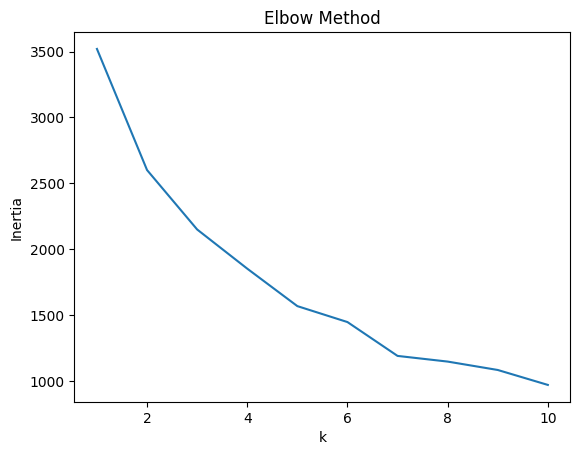

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.plot(K, inertia_values)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


### Observations from the Elbow Method

From the plotted curve:

The inertia drops sharply at first (from k = 1 to k = 3).

After k = 3, the rate of decrease slows and the curve begins to flatten.

This indicates that k = 3 or k = 4 is likely a good choice for the optimal number of clusters.

In this experiment, k = 3 was used for initial clustering, but further exploration with k = 4 may provide additional insights into customer behavior.

## conclusion
Using k-means clustering on the Wholesale Customers Dataset, we identified groups of customers with similar spending patterns. These clusters can help businesses understand:

Which customers buy mostly fresh goods

Which ones focus on grocery or milk products

Which groups purchase across multiple categories

The Elbow Method suggested that 3 clusters provide a good balance between simplicity and meaningful segmentation.
Overall, this analysis demonstrates how unsupervised learning can uncover hidden patterns in customer behavior and support business decision-making.